In [35]:
import pandas as senju
import numpy as nandini
import matplotlib.pyplot as kichu 
from wordcloud import WordCloud as dhamo
from gensim.models import Word2Vec

In [4]:
df = senju.read_csv('twt_data.csv')

In [5]:
df.sample(5)

,TWEET,Subjectivity,Polarity,Score
290,Does BJP have any BJPTerroristCell\njustaskin...,0.0,-0.10,Negative
19,TMC cant detach itself from comments Mahua Mo...,0.1,0.05,Positive
477,Sad INDvENG ENGvIND BJP teaching this Indians,1.0,-0.50,Negative
5,Caption This ! \n\nPMModi DraupadoMurmu BJP Ma...,0.0,0.00,Neutral
89,The BJPled center installing those Governors ...,0.1,-0.10,Negative


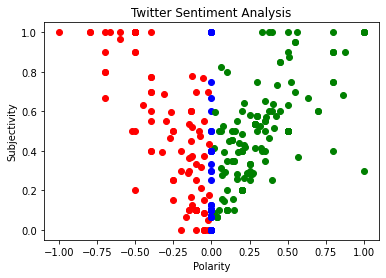

In [7]:
for index, row in df.iterrows():
    if row['Score'] == 'Positive':
        kichu.scatter(row['Polarity'], row['Subjectivity'], color="green")
    elif row['Score'] == 'Negative':
        kichu.scatter(row['Polarity'], row['Subjectivity'], color="red")
    elif row['Score'] == 'Neutral':
        kichu.scatter(row['Polarity'], row['Subjectivity'], color="blue")

kichu.title('Twitter Sentiment Analysis')
kichu.xlabel('Polarity')
kichu.ylabel('Subjectivity')
# add legend
kichu.show()

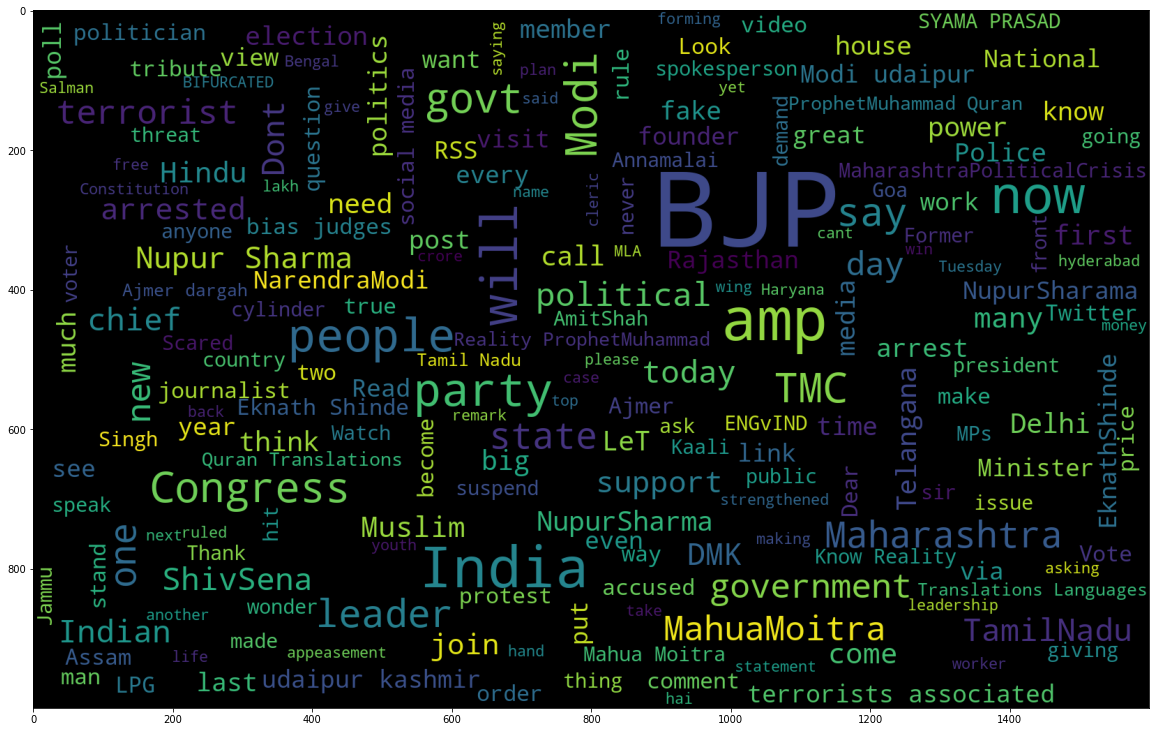

In [15]:
words = ' '.join([tweet for tweet in df['TWEET']])
kichu.figure(figsize = (20,20) )
dhamo = dhamo(width=1600, height=1000, max_font_size = 150).generate(words)
#max_words = 75,
kichu.imshow(dhamo)
kichu.show()

In [16]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')
def remove_stopwords(input_text):
  stopwords_list = stopwords.words('english')
  whitelist = ["n't", "not", "no"]
  words = input_text.split() 
  clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1] 
  return " ".join(clean_words) 
    
def remove_mentions(input_text):
  return re.sub(r'@\w+', '', input_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NANDHINI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NANDHINI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
df['Score'].value_counts()/df.shape[0]

Neutral     0.506
Positive    0.304
Negative    0.190
Name: Score, dtype: float64

In [18]:
df.shape

(500, 4)

c:\Users\NANDHINI\anaconda3\envs\twt\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


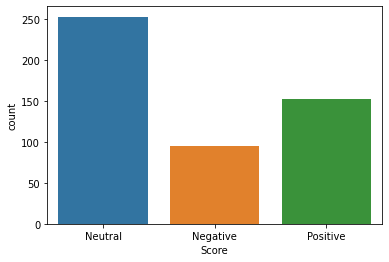

In [20]:
import seaborn as gokul
gokul.countplot(df['Score'])
kichu.show()

In [22]:
y = senju.get_dummies(df['Score'])

In [31]:
x = df['TWEET']

In [32]:
X

0      Delhi | BJP national president JPNadda pays tr...
1      Former Union Finance Minister, the late   ,  w...
2      BJP leader Guru Prakash Paswan criticises Kera...
3      Delhi  ArvindKejriwal  Tuesday alleged the BJP...
4      Now again freedom fighters like Mahatma Gandhi...
                             ...                        
495                        take   BJPNECInTelangana BJP 
496            ,  they where, why did they vote for BJP.
497    Millions  people  Assam suffer from adversitie...
498    Evidence tampering pro max \n\nAltNews Zubair ...
499    .   wonder the universe has named you correctl...
Name: TWEET, Length: 500, dtype: object

In [33]:
import re
def normalize_text(text):
    text=text.lower()
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(pic\.twitter\.com/[^\s]+))','', text)
    text = re.sub('@[^\s]+','', text)
    text = re.sub('#([^\s]+)', '', text)
    text = re.sub('[:;>?<=*+()&,\-#!$%\{˜|\}\[^_\\@\]1234567890’‘]',' ', text)
    text = re.sub('[\d]','', text)
    text = text.replace(".", '')
    text = text.replace("'", '')
    text = text.replace("`", '')
    text = text.replace("'s", '')
    text = text.replace("/", ' ')
    text = text.replace("\"", ' ')
    text = text.replace("\\", '')
    #text =  re.sub(r"\b[a-z]\b", "", text)
    text=re.sub( '\s+', ' ', text).strip()
    
    return text

X = X.apply(normalize_text)

In [34]:
X

0      delhi bjp national president jpnadda pays trib...
1      former union finance minister the late welledu...
2      bjp leader guru prakash paswan criticises kera...
3      delhi arvindkejriwal tuesday alleged the bjple...
4      now again freedom fighters like mahatma gandhi...
                             ...                        
495                           take bjpnecintelangana bjp
496                 they where why did they vote for bjp
497    millions people assam suffer from adversities ...
498    evidence tampering pro max altnews zubair udai...
499    wonder the universe has named you correctly da...
Name: TWEET, Length: 500, dtype: object